In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

#For Visualization
import plotly.express as px
import IPython.display as dsp
import seaborn as sns
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

import warnings # It provides control over warning messages.
warnings.filterwarnings('ignore')


/kaggle/input/netflix-shows/netflix_titles.csv


In [2]:
dsp.Image(url='https://images.ctfassets.net/y2ske730sjqp/1aONibCke6niZhgPxuiilC/2c401b05a07288746ddf3bd3943fbc76/BrandAssets_Logos_01-Wordmark.jpg?w=940')

In [3]:
# Load the data
df = pd.read_csv('/kaggle/input/netflix-shows/netflix_titles.csv')

# Display the first few rows
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [4]:
# Handle missing values
df['director'].fillna('Unknown', inplace=True)
df['cast'].fillna('Unknown', inplace=True)
df['country'].fillna('Unknown', inplace=True)

# Remove duplicates
df.drop_duplicates(inplace=True)


# Summary Of DataFrame
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      8807 non-null   object
 4   cast          8807 non-null   object
 5   country       8807 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB
None


In [5]:
df.count()

show_id         8807
type            8807
title           8807
director        8807
cast            8807
country         8807
date_added      8797
release_year    8807
rating          8803
duration        8804
listed_in       8807
description     8807
dtype: int64

In [6]:
df.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [7]:
df.shape

(8807, 12)

In [8]:
# Parse the 'date_added' column to datetime
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')

# Extract the month from the 'date_added' column
df['month_added'] = df['date_added'].dt.month

# Drop rows where 'month_added' is NaN
df = df.dropna(subset=['month_added'])

In [9]:
mcb = df['month_added'].value_counts().sort_index()
print(mcb)

month_added
1.0     727
2.0     557
3.0     734
4.0     759
5.0     626
6.0     724
7.0     819
8.0     749
9.0     765
10.0    755
11.0    697
12.0    797
Name: count, dtype: int64


In [10]:
tp5b = mcb.nlargest(5)

# Print the top 5months
print("\nTop 5 Months before cleaning:")
print(tp5b)


Top 5 Months before cleaning:
month_added
7.0     819
12.0    797
9.0     765
4.0     759
10.0    755
Name: count, dtype: int64


In [11]:
#Dropping Rows with Unknown directors as such rows affect our analysis accuracy

# Create a boolean mask for rows where 'director' does not contain 'unknown'
mask = ~df['director'].astype(str).str.contains('Unknown')

# Filter DataFrame using the mask
df_cleaned = df[mask]

# Display the cleaned DataFrame
df_cleaned.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,month_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",9.0
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,9.0
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",Unknown,2021-09-24,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...,9.0
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",Unknown,2021-09-24,2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...,9.0
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...",2021-09-24,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...",9.0


In [12]:
mc = df_cleaned['month_added'].value_counts().sort_index()
print(mc)

month_added
1.0     537
2.0     385
3.0     541
4.0     549
5.0     445
6.0     495
7.0     576
8.0     529
9.0     520
10.0    546
11.0    496
12.0    549
Name: count, dtype: int64


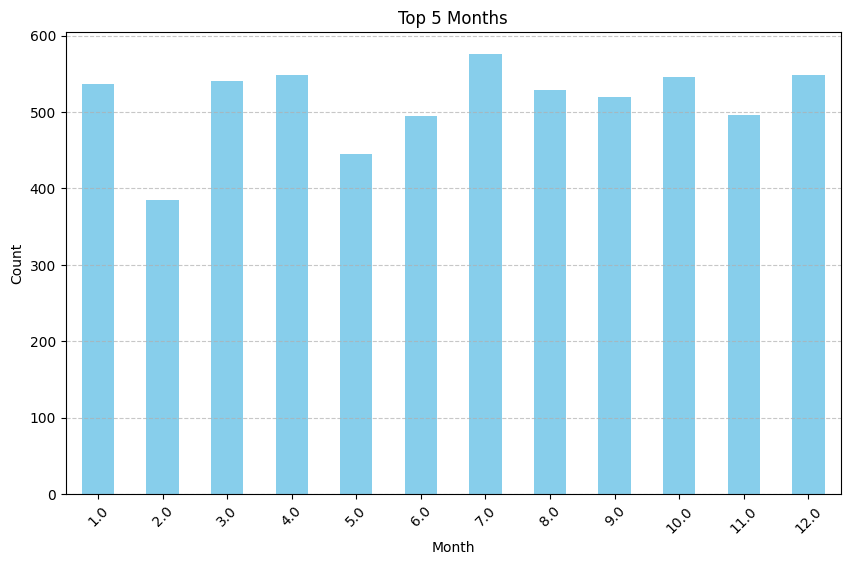

In [13]:
# Plot the top 10 monthly counts
plt.figure(figsize=(10, 6))
mc.plot(kind='bar', color='skyblue')
plt.title('Top 5 Months')
plt.xlabel('Month')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [14]:
# Get the top 5 months
tp5 = mc.nlargest(5)

# Print the top 5months
print("\nTop 5 Months after cleaning:")
print(tp5)


Top 5 Months after cleaning:
month_added
7.0     576
4.0     549
12.0    549
10.0    546
3.0     541
Name: count, dtype: int64


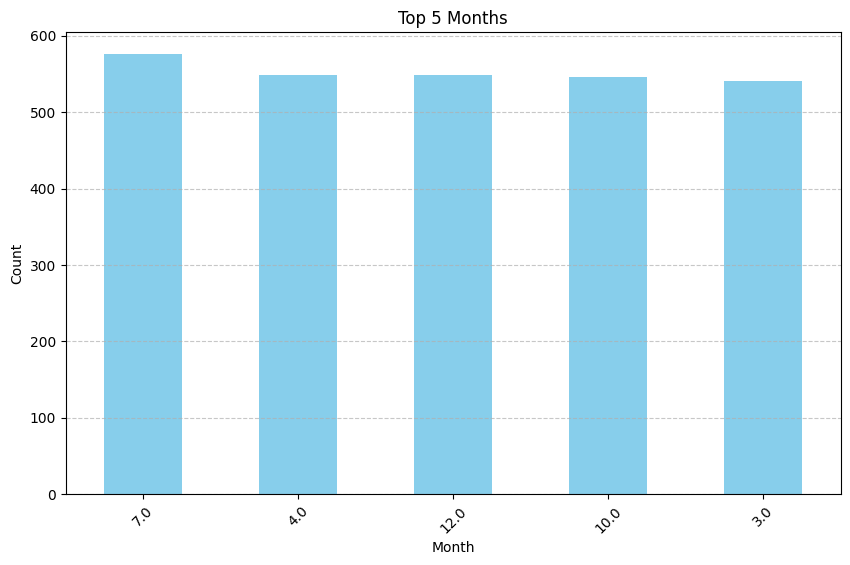

In [15]:
# Plot the top 5 monthly counts
plt.figure(figsize=(10, 6))
tp5.plot(kind='bar', color='skyblue')
plt.title('Top 5 Months')
plt.xlabel('Month')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [16]:
# Filter for movies
movies_df = df_cleaned[df_cleaned['type'] == 'Movie']

# Define valid ratings
valid_ratings = ['PG-13', 'PG', 'TV-MA', 'TV-PG', 'TV-14', 'TV-Y', 'R', 'TV-G', 'TV-Y7', 'G', 'NC-17', 'NR', 'TV-Y7-FV', 'UR']

# Filter movies with valid ratings
clean_movies_df = movies_df[movies_df['rating'].isin(valid_ratings)]

# Find top directors
top_directors = clean_movies_df['director'].value_counts().head(10).index.tolist()

# Select movies by top directors
top_movies_by_directors = clean_movies_df[clean_movies_df['director'].isin(top_directors)]

# Display top 10 movies
top_10_movies = top_movies_by_directors[['title', 'director', 'rating', 'duration']].head(10)
top_10_movies


,title,director,rating,duration
41,Jaws,Steven Spielberg,PG,124 min
329,Catch Me If You Can,Steven Spielberg,PG-13,142 min
406,Chhota Bheem - Neeli Pahaadi,Rajiv Chilaka,TV-Y7,64 min
407,Chhota Bheem & Ganesh,Rajiv Chilaka,TV-Y7,68 min
408,Chhota Bheem & Krishna: Mayanagari,Rajiv Chilaka,TV-Y7,67 min
409,Chhota Bheem & Krishna: Pataliputra- City of t...,Rajiv Chilaka,TV-Y7,66 min
410,Chhota Bheem And The Broken Amulet,Rajiv Chilaka,TV-Y7,64 min
411,Chhota Bheem And The Crown of Valhalla,Rajiv Chilaka,TV-Y7,64 min
412,Chhota Bheem and the Incan Adventure,Rajiv Chilaka,TV-Y7,65 min
413,Chhota Bheem and The ShiNobi Secret,Rajiv Chilaka,TV-Y7,64 min
